# Step 1: Load and Inspect the Dataset

In this step, we load the SEER colorectal cancer dataset and perform an initial inspection. 
This includes:
- Checking the shape of the dataset (rows × columns)
- Viewing the first few records
- Understanding data types
- Identifying any obvious data quality issues such as missing values

These insights will help guide preprocessing and model development steps.


In [50]:
# Step 1: Load and Inspect the Dataset

# Import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv("colrect.csv", low_memory=False)

# Display shape of the dataset
print("Dataset shape (rows, columns):", df.shape)

# Preview the first 5 rows
df.head()


Dataset shape (rows, columns): (866740, 149)


,CASENUM,REG,MAR_STAT,RACE,ORIGIN,NHIA,SEX,AGE_DX,YR_BRTH,SEQ_NUM,...,ADJM_6VALUE,ADJAJCCSTG,CS7SITE,CS9SITE,CS12SITE,HER2,BRST_SUB,PLC_BRTH_CNTRY,PLC_BRTH_STATE,ANNARBOR
0,16,1501,1,1,0,0,1,69,1930.0,2,...,NaN,NaN,NaN,NaN,NaN,9,9,ZZU,ZZ,8
1,22,1501,1,1,1,1,2,39,1968.0,2,...,NaN,NaN,NaN,NaN,NaN,9,9,USA,CA,8
2,42,1501,5,2,0,0,1,61,1934.0,0,...,NaN,NaN,NaN,NaN,NaN,9,9,USA,MS,8
3,57,1501,4,1,0,0,2,82,1904.0,0,...,NaN,NaN,NaN,NaN,NaN,9,9,NOR,XX,8
4,61,1501,5,1,0,0,2,81,1906.0,1,...,NaN,NaN,NaN,NaN,NaN,9,9,USA,CA,8


In [ ]:
# Show data types and non-null values per column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866740 entries, 0 to 866739
Columns: 149 entries, CASENUM to ANNARBOR
dtypes: float64(84), int64(59), object(6)
memory usage: 985.3+ MB


In [ ]:
# Summary statistics for numerical columns
df.describe()


,CASENUM,REG,MAR_STAT,RACE,ORIGIN,NHIA,SEX,AGE_DX,YR_BRTH,SEQ_NUM,...,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,CS7SITE,CS9SITE,CS12SITE,HER2,BRST_SUB,ANNARBOR
count,8.667400e+05,866740.000000,866740.000000,866740.000000,866740.000000,866740.000000,866740.000000,866740.000000,866684.000000,866740.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,866740.0,866740.0,866740.0
mean,4.205515e+07,1526.124750,3.023675,2.363184,0.353905,0.303086,1.490527,68.985410,1928.317094,0.522762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0
std,2.918634e+07,14.707602,1.888242,9.593481,1.459153,1.282661,0.499911,15.274456,17.220529,1.183130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
min,1.600000e+01,1501.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1872.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0
25%,1.731776e+07,1520.000000,2.000000,1.000000,0.000000,0.000000,1.000000,60.000000,1916.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0
50%,3.572487e+07,1525.000000,2.000000,1.000000,0.000000,0.000000,1.000000,70.000000,1927.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0
75%,6.792910e+07,1541.000000,5.000000,1.000000,0.000000,0.000000,2.000000,79.000000,1940.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0
max,9.884963e+07,1547.000000,9.000000,99.000000,9.000000,8.000000,2.000000,999.000000,2008.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,8.0


In [ ]:

df.describe().transpose().to_excel("summary_statistics.xlsx")


# Step 2: Missing Value Analysis

This step focuses on identifying and handling missing data. It helps us:
- Understand which columns have missing values
- Decide whether to drop or impute those columns
- Clean the dataset to avoid errors during model training

We will use a threshold (e.g., 70%) to drop columns that are mostly empty, and impute the rest.


In [ ]:
# Step 2.1: Calculate % of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter only columns with any missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort descending to see worst columns first
missing_percentage.sort_values(ascending=False, inplace=True)

# Display top 30 columns with missing data
missing_percentage.head(30)


CS12SITE        100.000000
ADJNM_6VALUE    100.000000
CS_SSF10        100.000000
CS_SSF3         100.000000
CS_SSF13        100.000000
CS_SSF15        100.000000
CS_SSF16        100.000000
VASINV          100.000000
CS_SSF11        100.000000
ADJTM_6VALUE    100.000000
RECONST         100.000000
ADJM_6VALUE     100.000000
ADJAJCCSTG      100.000000
CS7SITE         100.000000
EOD10_PE        100.000000
CS9SITE         100.000000
CS_SSF5         100.000000
O_LEUKDX         99.984424
O_SITEOD         99.982578
O_SITBEH         99.977502
O_SITMOR         99.972541
H_BENIGN         99.959850
O_DFSITE         99.945543
O_SITAGE         99.943466
O_RPTSRC         99.925237
O_EODDT          99.910008
O_SURCON         99.898932
O_SEQLAT         99.802940
O_SITTYP         99.768558
O_SEQCON         99.481505
dtype: float64

In [ ]:
# Step 2.2: Drop columns where more than 70% of values are missing
columns_to_drop = missing_percentage[missing_percentage > 70].index.tolist()

print(f"Columns dropped due to excessive missing values: {len(columns_to_drop)}")

# Drop from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)


Columns dropped due to excessive missing values: 46


#### Step 2.3: Drop Redundant and Leaky Columns (Domain Knowledge)

After eliminating columns with more than 70% missing values, we further refined the dataset by removing additional features based on domain knowledge and modeling best practices.

The following types of columns were dropped:

- **Identifier fields** (e.g., `CASENUM`, `SEQ_NUM`, `REC_NO`) which are unique to each record and do not carry predictive value.
- **Outcome leakage columns** (e.g., `SURV_TIME_MON`, `DTH_CLASS`) which contain information about survival time or death status and would unfairly improve model performance.
- **Redundant staging variables** (e.g., `AJ_3SEER`, `AJCC_STG`, `CS_SSFx`, `EOD10_*`) that overlap with other well-reported staging fields or are sparsely filled.
- **Non-colorectal or site-specific features** (e.g., `HER2`, `BRST_SUB`, `RECONST`) that apply to other cancer types and are not relevant to our colorectal cancer cohort.
- **Administrative or metadata columns** (e.g., `CSV_CUR`, `STAT_REC`) that are not clinically meaningful.

This step ensures that the dataset includes only valid, non-leaky, and clinically interpretable features, thereby improving model robustness and generalizability.


In [ ]:
# Step 2.3: Drop all redundant or leaky columns

redundant_cols = [
    'CASENUM', 'SEQ_NUM', 'REC_NO', 'DTH_CLASS', 'STAT_REC',
    'SS_SURG', 'AJ_3SEER', 'AJCC_STG', 'ADJAJCCSTG', 'ADJM_6VALUE', 'ADJNM_6VALUE',
    'ADJTM_6VALUE', 'HER2', 'BRST_SUB', 'RECONST', 'CS_SSF2', 'CS_SSF3', 'CS_SSF5',
    'CS_SSF10', 'CS_SSF11', 'CS_SSF13', 'CS_SSF15', 'CS_SSF16', 'CS7SITE', 'CS9SITE',
    'CS12SITE', 'CSV_ORG', 'CSV_CUR', 'CS_SIZE', 'CS_METS', 'CS_NODE', 'CS_EXT',
    'SCOPE', 'SCOPE02', 'SURGPRIM', 'SURGOTH', 'SRGOTH02', 'METSEVAL', 'NODEEVAL',
    'EOD10_SZ', 'EOD10_NE', 'EOD10_ND', 'EOD10_PE', 'EOD10_EX', 'EOD13', 'EODC0DE',
    'D_AJCC_M', 'D_AJCC_N', 'D_AJCC_T', 'D_AJCC_S', 'D_SSG00', 'D_SSG77', 'SSG77',
    'SSG2000', 'EXTEVAL', 'HIST_SSG_2000', 'IHS', 'CSSCHEMA', 'RAC_RECY', 'PLC_BRTH_CNTRY'
]

# Drop only those that still exist in the DataFrame
df.drop(columns=[col for col in redundant_cols if col in df.columns], inplace=True)
print(f" Dropped {len(redundant_cols)} redundant/leaky columns.")


 Dropped 60 redundant/leaky columns.


In [ ]:
# View all current column names in the dataset
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['REG', 'MAR_STAT', 'RACE', 'ORIGIN', 'NHIA', 'SEX', 'AGE_DX', 'YR_BRTH', 'DATE_mo', 'DATE_yr', 'SITEO2V', 'LATERAL', 'HISTO2V', 'BEHO2V', 'HISTO3V', 'BEHO3V', 'GRADE', 'DX_CONF', 'REPT_SRC', 'EOD10_PN', 'EODCODE', 'TUMOR_1V', 'TUMOR_2V', 'TUMOR_3V', 'CS_SSF1', 'CS_SSF25', 'D_AJCC_F', 'D_SSG77F', 'D_SSG00F', 'CSV_DER', 'NO_SURG', 'RADIATN', 'RAD_BRN', 'RAD_SURG', 'TYPEFUP', 'AGE_REC', 'SITERWHO', 'ICDOTO9V', 'ICDOT10V', 'ICCC3WHO', 'ICCC3XWHO', 'BEHANAL', 'HISTREC', 'BRAINREC', 'CS0204SCHEMA', 'RAC_RECA', 'NHIAREC', 'HST_STGA', 'NUMPRIMS', 'FIRSTPRM', 'STCOUNTY', 'ICD_5DIG', 'CODKM', 'AYA_RECODE', 'LYMPHOMA_RECODE', 'O_DTH_CLASS', 'INTPRIM', 'ERSTATUS', 'PRSTATUS', 'SRV_TIME_MON', 'SRV_TIME_MON_FLAG', 'SRV_TIME_MON_PA', 'SRV_TIME_MON_FLAG_PA', 'PLC_BRTH_STATE', 'ANNARBOR']


## Step 3: Create the Target Variable (5-Year Survival)

To prepare for binary classification, we create the `target` variable using the `SRV_TIME_MON` (Survival Time in Months) column.

Definition:
- `target = 1` → patient survived ≥ 60 months (i.e., 5 years or more)
- `target = 0` → patient survived < 60 months

After creating the target, we drop `SRV_TIME_MON` to avoid data leakage during modeling.


In [ ]:
# Step 3: Create the binary classification target

# Create the target: 1 if survival time is 5 years or more, else 0
df['target'] = (df['SRV_TIME_MON'] >= 60).astype(int)

# Drop the source column to prevent data leakage
df.drop(columns=['SRV_TIME_MON'], inplace=True)

# Show class distribution
print(" Target variable created. Class distribution:")
print(df['target'].value_counts())


 Target variable created. Class distribution:
target
0    535508
1    331232
Name: count, dtype: int64


## Step 4: Imputation and Encoding

To prepare the dataset for EDA and modeling, we impute missing values and encode categorical features.

- **Numerical columns**: Imputed using median
- **Categorical columns**: Imputed using mode
- **Categorical encoding**: Applied `LabelEncoder` to convert string or discrete categories into numeric format


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Imputation and Encoding

# 1. Make a working copy of the cleaned data
df_model = df.copy()

# 2. Print columns with missing values BEFORE imputation
print("Missing values BEFORE imputation:")
missing_before = df_model.isnull().sum()
print(missing_before[missing_before > 0])

# 3. Impute missing values
for col in df_model.columns:
    if df_model[col].isnull().sum() > 0:
        if df_model[col].dtype in ['int64', 'float64']:
            # Numeric column → median imputation
            df_model[col].fillna(df_model[col].median(), inplace=True)
        else:
            # Categorical column (object or other) → mode imputation
            df_model[col].fillna(df_model[col].mode()[0], inplace=True)

# 4. Encode categorical columns using LabelEncoder
label_enc = LabelEncoder()
for col in df_model.select_dtypes(include=['object', 'category']).columns:
    df_model[col] = label_enc.fit_transform(df_model[col].astype(str))

# 5. Final check
missing_after = df_model.isnull().sum().sum()
print(f"\n Total missing values AFTER imputation: {missing_after}")


Missing values BEFORE imputation:
YR_BRTH         56
EOD10_PN    172890
EODCODE     320083
TUMOR_1V    320083
TUMOR_2V    320083
TUMOR_3V    320083
CS_SSF1     557709
CS_SSF25    546657
D_AJCC_F    546657
D_SSG77F    546657
D_SSG00F    546657
CSV_DER     546657
dtype: int64


/var/folders/z5/33ws0h0n2ql84h0hvvxsvn9r0000gn/T/ipykernel_23050/2897065571.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[col].fillna(df_model[col].median(), inplace=True)



 Total missing values AFTER imputation: 0


 Number of categorical features before encoding: 3


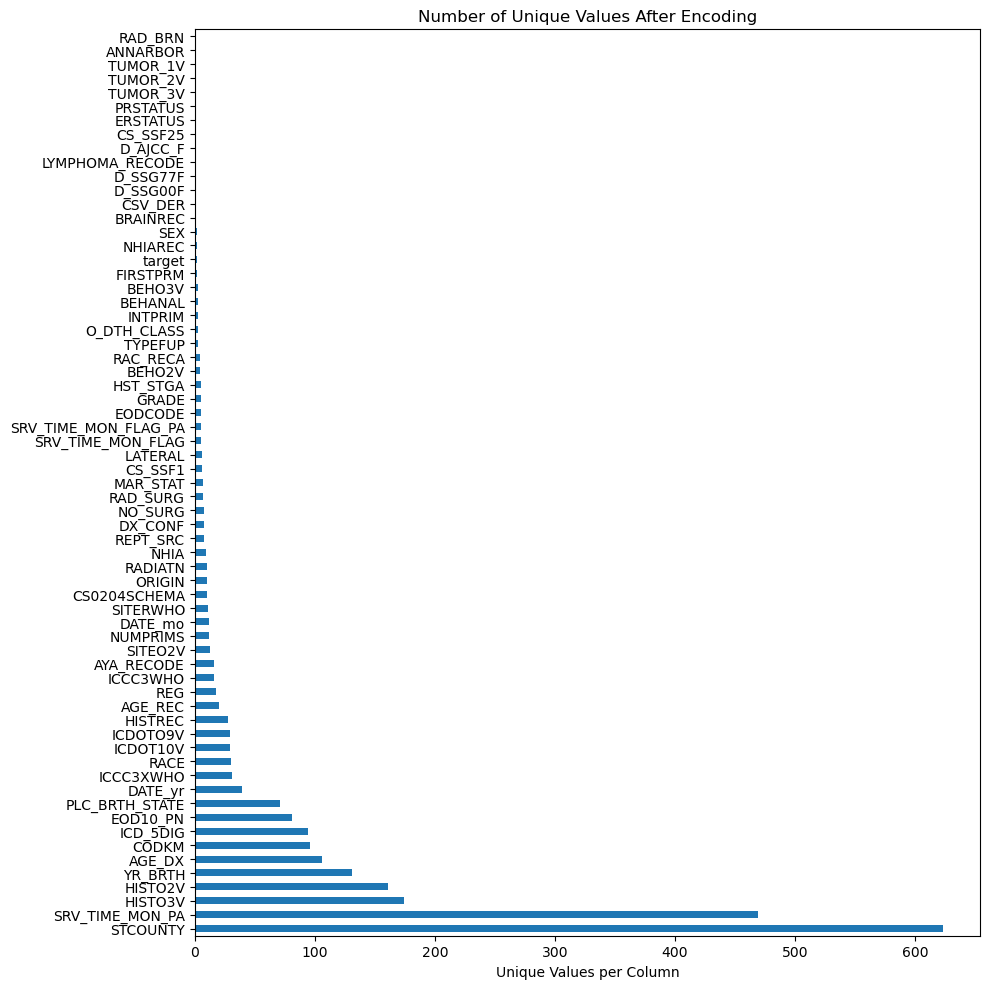

In [ ]:
import matplotlib.pyplot as plt
# Count categorical features before encoding (if available)
cat_cols_before = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f" Number of categorical features before encoding: {len(cat_cols_before)}")

# Count unique values after encoding
encoded_uniques = df_model.nunique().sort_values(ascending=False)
encoded_uniques.plot(kind='barh', figsize=(10, 10), title='Number of Unique Values After Encoding')
plt.xlabel("Unique Values per Column")
plt.tight_layout()
plt.show()


In [ ]:
# Drop metadata or overly detailed columns
drop_cols = ['STCOUNTY', 'SRV_TIME_MON_PA']

# Drop only if they exist
df_model.drop(columns=[col for col in drop_cols if col in df_model.columns], inplace=True)

# Group rare HISTO2V values (keep top 10)
top_hist2v = df_model['HISTO2V'].value_counts().nlargest(10).index
df_model['HISTO2V'] = df_model['HISTO2V'].apply(lambda x: x if x in top_hist2v else 999)


### Categorical Cardinality Summary

We reviewed the number of unique values per feature after encoding:

- Most features had manageable cardinality.
- `STCOUNTY` and `SRV_TIME_MON_PA` were dropped due to excessive administrative detail and low modeling value.
- `HISTO2V` was grouped by keeping only the top 10 most frequent codes, with the rest labeled as "Other (999)".

This ensures a balance between model complexity and interpretability.


In [ ]:
import matplotlib.pyplot as plt

# Before imputation: simulate by reloading raw dataset if needed
# Replace this with your actual "before" data if available
# missing_before = df_before.isnull().sum().sort_values(ascending=False)

# After imputation
missing_after = df_model.isnull().sum().sort_values(ascending=False)
missing_after = missing_after[missing_after > 0]

# If no missing values left
if missing_after.empty:
    print("All missing values successfully imputed.")
else:
    missing_after.plot(kind='barh', figsize=(10, 6), title="Missing Values After Imputation")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()


All missing values successfully imputed.


## Step 5: Feature Filtering and Dimensionality Reduction

This step reduces the dataset to only the most predictive and non-redundant features through the following steps:

- 5.1: Remove low-variance features
- 5.2: Filter by correlation with the target variable
- 5.3: Drop highly correlated (redundant) feature pairs
- 5.4: Rank and retain top features using Random Forest importance


In [ ]:
# Step 5.1: Remove low-variance features
low_var_cols = [col for col in df_model.columns if df_model[col].nunique() <= 1]
df_model.drop(columns=low_var_cols, inplace=True)
print(" Dropped low-variance columns:", low_var_cols)


 Dropped low-variance columns: ['TUMOR_1V', 'TUMOR_2V', 'TUMOR_3V', 'CS_SSF25', 'D_AJCC_F', 'D_SSG77F', 'D_SSG00F', 'CSV_DER', 'RAD_BRN', 'BRAINREC', 'LYMPHOMA_RECODE', 'ERSTATUS', 'PRSTATUS', 'ANNARBOR']


In [ ]:
# Step 5.2: Remove features weakly correlated with target
correlation = df_model.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)
correlation_threshold = 0.05
selected_features = correlation[correlation >= correlation_threshold].index.tolist()

# Ensure 'target' stays
if 'target' not in selected_features:
    selected_features.append('target')

# Filter dataset
df_model = df_model[selected_features]
print(f" Retained {len(selected_features)-1} features with correlation ≥ {correlation_threshold}")


 Retained 24 features with correlation ≥ 0.05


In [ ]:
# Step 5.3: Remove highly correlated features (pairwise correlation > 0.9)
import numpy as np
corr_matrix = df_model.drop(columns='target').corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
df_model.drop(columns=to_drop, inplace=True)

print(" Dropped redundant correlated features:", to_drop)


 Dropped redundant correlated features: ['SRV_TIME_MON_FLAG_PA', 'AGE_DX', 'BEHO3V', 'ICCC3WHO', 'ICCC3XWHO', 'BEHANAL', 'BEHO2V', 'AYA_RECODE', 'ICDOTO9V']


/var/folders/z5/33ws0h0n2ql84h0hvvxsvn9r0000gn/T/ipykernel_23050/1927135008.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:15], y=importances.index[:15], palette='viridis')


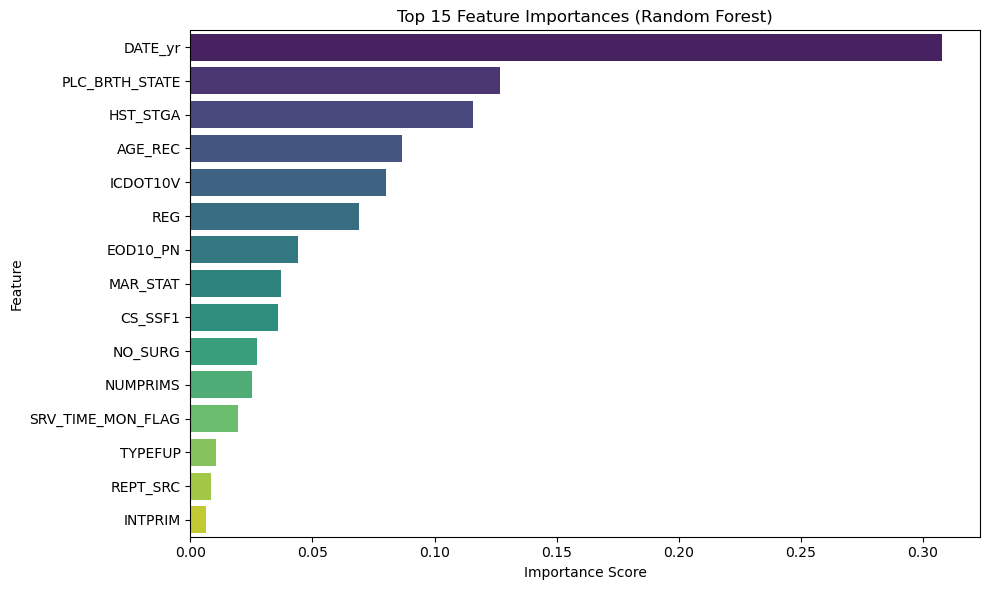

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5.4: Feature importance using Random Forest
X = df_model.drop(columns='target')
y = df_model['target']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:15], y=importances.index[:15], palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Keep top 15
top_features = importances.head(15).index.tolist()
df_model = df_model[top_features + ['target']]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define X and y
X = df_model.drop(columns='target')
y = df_model['target']

# Standardize features (important for linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_scaled, y)

# Get absolute coefficient importance
lr_importance = pd.Series(np.abs(lr.coef_[0]), index=X.columns).sort_values(ascending=False)

# Display top 15
print("🔁 Top 15 Features by Logistic Regression Importance:")
print(lr_importance.head(15))


🔁 Top 15 Features by Logistic Regression Importance:
HST_STGA             0.743862
DATE_yr              0.405020
AGE_REC              0.370400
CS_SSF1              0.335016
PLC_BRTH_STATE       0.263543
SRV_TIME_MON_FLAG    0.246700
REPT_SRC             0.241422
TYPEFUP              0.237702
NUMPRIMS             0.164930
NO_SURG              0.153433
EOD10_PN             0.097317
MAR_STAT             0.040006
INTPRIM              0.028120
ICDOT10V             0.018994
REG                  0.001878
dtype: float64


 Top 15 Features by Logistic Regression Importance:
HST_STGA             0.743862
DATE_yr              0.405020
AGE_REC              0.370400
CS_SSF1              0.335016
PLC_BRTH_STATE       0.263543
SRV_TIME_MON_FLAG    0.246700
REPT_SRC             0.241422
TYPEFUP              0.237702
NUMPRIMS             0.164930
NO_SURG              0.153433
EOD10_PN             0.097317
MAR_STAT             0.040006
INTPRIM              0.028120
ICDOT10V             0.018994
REG                  0.001878
dtype: float64


/var/folders/z5/33ws0h0n2ql84h0hvvxsvn9r0000gn/T/ipykernel_23050/3483766910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lr_importance.values[:15], y=lr_importance.index[:15], palette='magma')


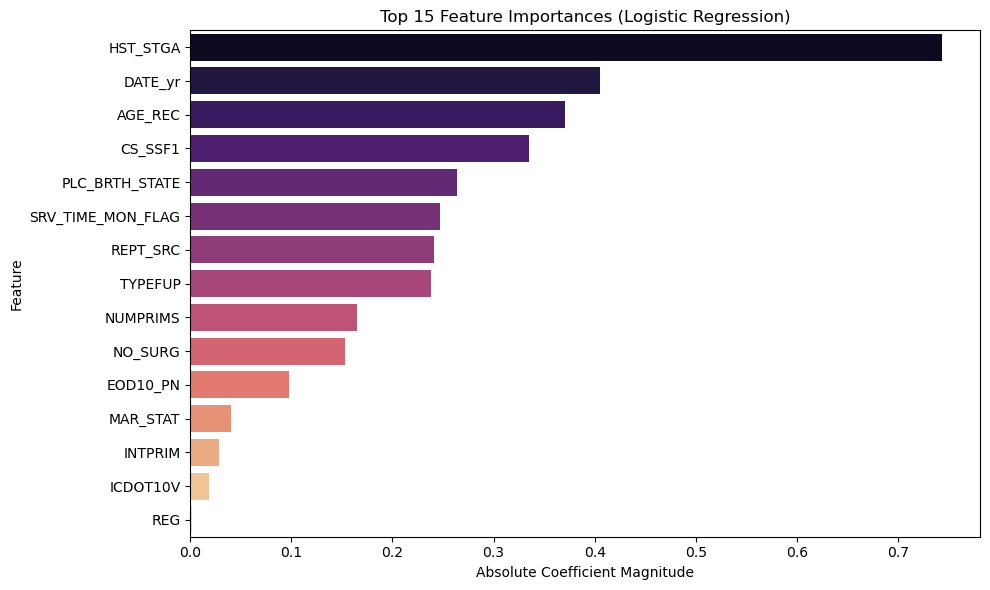

In [ ]:
# Show top 15 for consistency
print(" Top 15 Features by Logistic Regression Importance:")
print(lr_importance.head(15))

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x=lr_importance.values[:15], y=lr_importance.index[:15], palette='magma')
plt.title("Top 15 Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest importances 
rf_top = importances.head(15)
rf_top_features = rf_top.index.tolist()

# Logistic Regression importances based on this 
lr_top = lr_importance.head(15)
lr_top_features = lr_top.index.tolist()

# Find intersection
common_features = list(set(rf_top_features) & set(lr_top_features))
print(" Common top features from both models:", common_features)

# Optionally: create ranked consensus table
consensus_df = pd.DataFrame({
    'RF_Rank': [rf_top_features.index(f) + 1 if f in rf_top_features else None for f in common_features],
    'LR_Rank': [lr_top_features.index(f) + 1 if f in lr_top_features else None for f in common_features],
}, index=common_features)

consensus_df['Average_Rank'] = consensus_df.mean(axis=1).round(1)
consensus_df = consensus_df.sort_values(by='Average_Rank')

print("\n Consensus Feature Ranking:\n")
print(consensus_df)


 Common top features from both models: ['REG', 'PLC_BRTH_STATE', 'NO_SURG', 'INTPRIM', 'DATE_yr', 'REPT_SRC', 'TYPEFUP', 'CS_SSF1', 'EOD10_PN', 'NUMPRIMS', 'SRV_TIME_MON_FLAG', 'AGE_REC', 'HST_STGA', 'ICDOT10V', 'MAR_STAT']

 Consensus Feature Ranking:

                   RF_Rank  LR_Rank  Average_Rank
DATE_yr                  1        2           1.5
HST_STGA                 3        1           2.0
PLC_BRTH_STATE           2        5           3.5
AGE_REC                  4        3           3.5
CS_SSF1                  9        4           6.5
EOD10_PN                 7       11           9.0
SRV_TIME_MON_FLAG       12        6           9.0
ICDOT10V                 5       14           9.5
NO_SURG                 10       10          10.0
NUMPRIMS                11        9          10.0
MAR_STAT                 8       12          10.0
REG                      6       15          10.5
REPT_SRC                14        7          10.5
TYPEFUP                 13        8          1

In [56]:
final_features = [
    'HST_STGA',       # Cancer stage — strongest survival predictor
    'DATE_yr',        # Year of diagnosis — reflects treatment era
    'AGE_REC',        # Age at diagnosis — older age = lower survival
    'CS_SSF1',        # Site-specific factor — biomarker/tumor info (if not heavily missing)
    'NUMPRIMS',       # Number of primary tumors — disease burden
    'NO_SURG',        # Surgery indicator — critical for treatment status
    'EOD10_PN',       # Lymph node involvement — key staging factor
    'MAR_STAT',       # Marital status — social support = better outcomes
    'ICDOT10V'        # Tumor site — affects treatment and prognosis
]


#### To ensure robustness, we compared feature importance rankings across both models and retained features that appeared in the top 15 of both.We then averaged their ranks and selected the top 9 features with the highest consensus to use in our final modeling phase.This dual-model approach increases confidence in the relevance of the selected features and ensures they capture both linear and nonlinear patterns in the data.
### Final Selected Features for Modeling:
The following 10 features were selected based on consistent top performance across both Random Forest and Logistic Regression models:

    'HST_STGA',       # Cancer stage — strongest survival predictor
    'DATE_yr',        # Year of diagnosis — reflects treatment era
    'AGE_REC',        # Age at diagnosis — older age = lower survival
    'CS_SSF1',        # Site-specific factor — biomarker/tumor info (if not heavily missing)
    'NUMPRIMS',       # Number of primary tumors — disease burden
    'NO_SURG',        # Surgery indicator — critical for treatment status
    'EOD10_PN',       # Lymph node involvement — key staging factor
    'MAR_STAT',       # Marital status — social support = better outcomes
    'ICDOT10V'        # Tumor site — affects treatment and prognosis
These features represent a robust and well-balanced mix of demographic, clinical, temporal, and treatment-related variables.

## Step 6: EDA Visualization for Final Selected Features

We generated visualizations for each of the 10 final selected features to examine their distribution and relationship with the target variable (5-year survival).

Each feature was plotted using an appropriate chart type based on its data type and distribution:

- **Boxplot**: Used for continuous numeric features (e.g., `AGE_REC`) to compare distributions between survival outcomes.
- **Violin plot**: Used to show the full distribution and density of continuous/categorical features (e.g., `CS_SSF1`) across classes.
- **Countplot**: Applied to categorical or discrete numeric features to show class-wise counts (e.g., `DATE_yr`, `HST_STGA`, `REPT_SRC`).
- **Stacked bar chart**: Used for binary indicators (e.g., `NO_SURG`, `SRV_TIME_MON_FLAG`) to show class proportions by feature values.

These plots provide visual confirmation of each feature’s potential predictive relationship with survival and support the results of our model-based feature selection.


/var/folders/z5/33ws0h0n2ql84h0hvvxsvn9r0000gn/T/ipykernel_23050/2781278797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='target', palette='Set2')


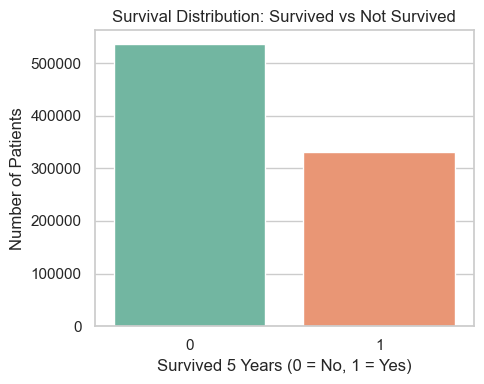

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(5, 4))
sns.countplot(data=df_model, x='target', palette='Set2')

# Add title and axis labels
plt.title("Survival Distribution: Survived vs Not Survived")
plt.xlabel("Survived 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")

# Show plot
plt.tight_layout()
plt.show()


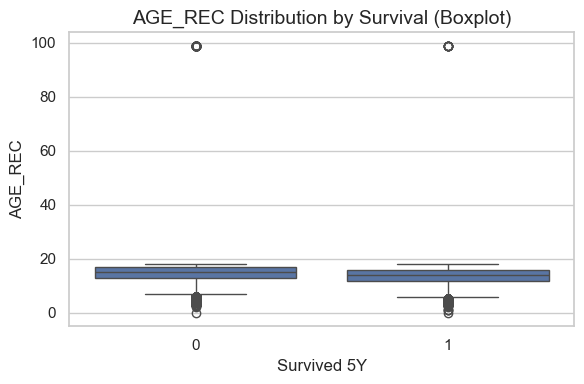

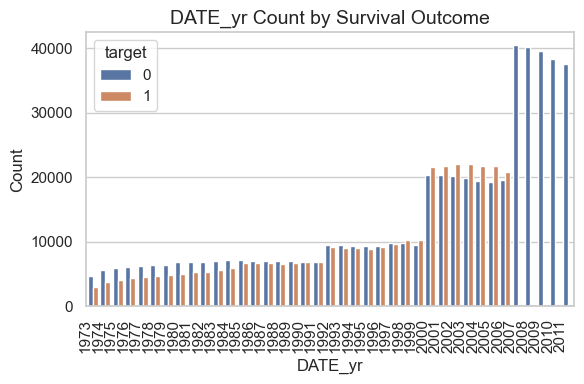

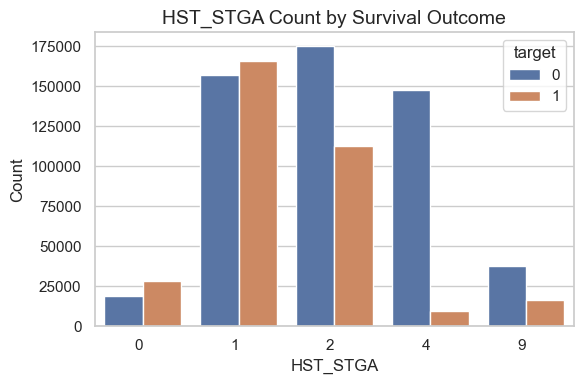

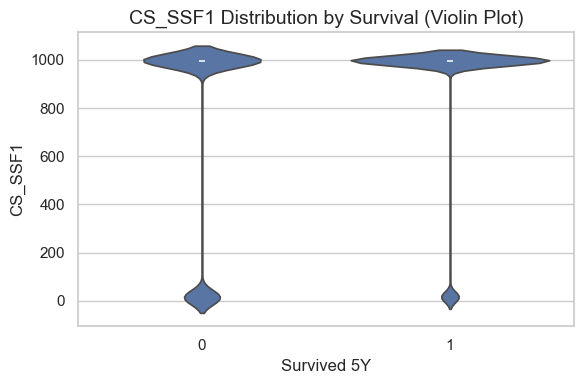

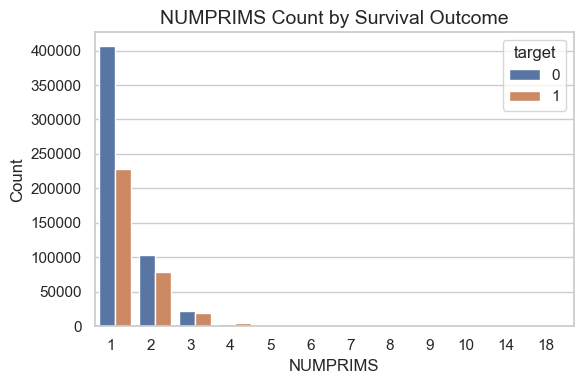

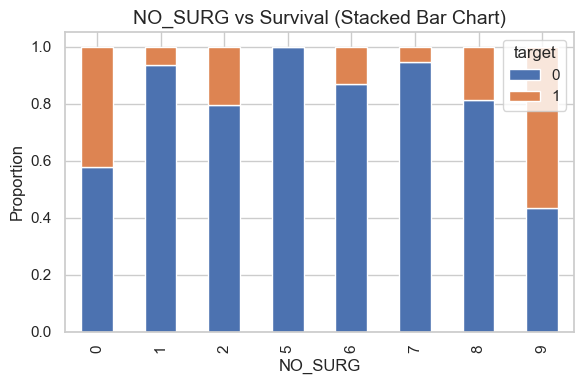

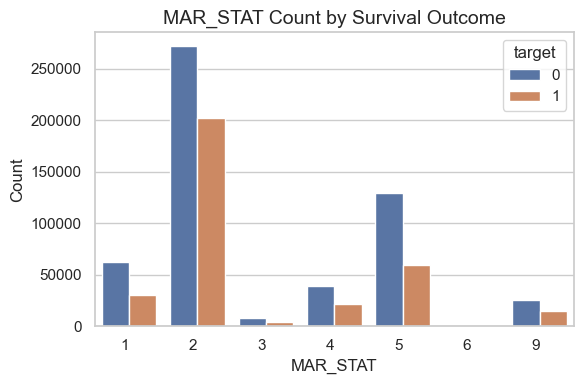

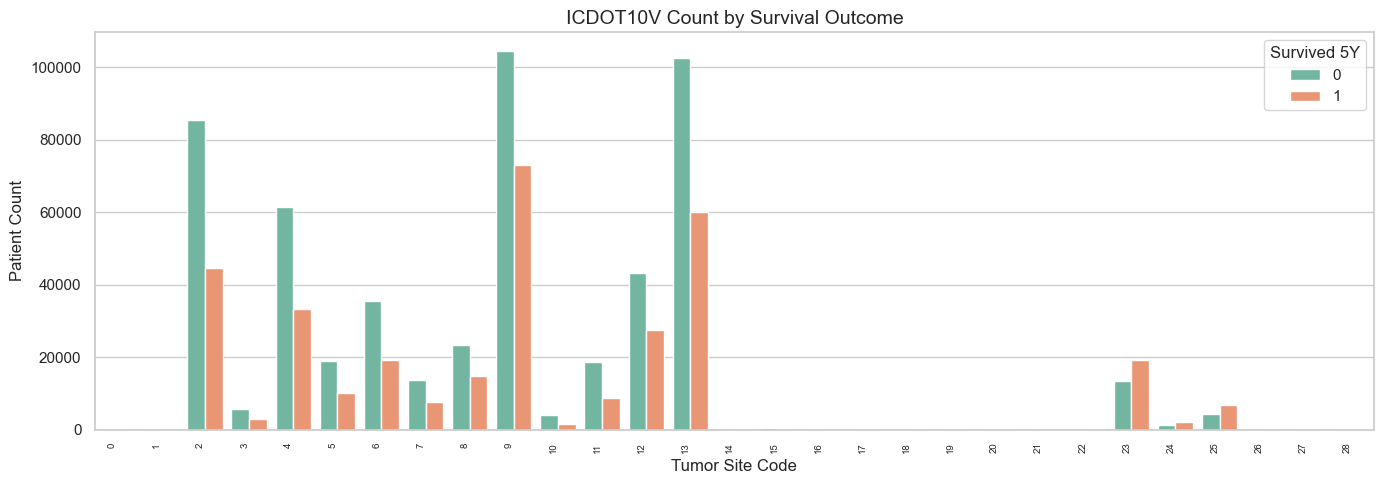

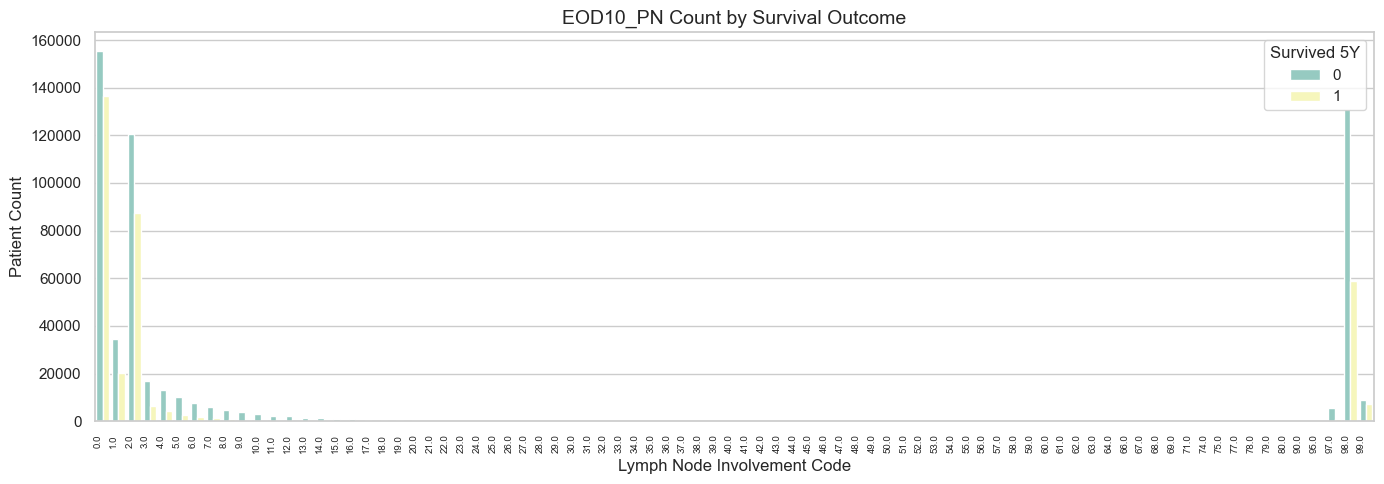

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global plot settings
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (6, 4), 'axes.titlesize': 14, 'axes.labelsize': 12})

# Helper countplot function
def countplot_with_rotation(data, x, hue, title, rotation=0):
    plt.figure()
    sns.countplot(data=data, x=x, hue=hue)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

# 1. Boxplot for AGE_REC
plt.figure()
sns.boxplot(data=df_model, x='target', y='AGE_REC')
plt.title("AGE_REC Distribution by Survival (Boxplot)")
plt.xlabel("Survived 5Y")
plt.ylabel("AGE_REC")
plt.tight_layout()
plt.show()

# 2. Count plot for DATE_yr
countplot_with_rotation(df_model, 'DATE_yr', 'target', "DATE_yr Count by Survival Outcome", rotation=90)

# 3. Count plot for HST_STGA
countplot_with_rotation(df_model, 'HST_STGA', 'target', "HST_STGA Count by Survival Outcome")

# 4. Violin plot for CS_SSF1
plt.figure()
sns.violinplot(data=df_model, x='target', y='CS_SSF1')
plt.title("CS_SSF1 Distribution by Survival (Violin Plot)")
plt.xlabel("Survived 5Y")
plt.ylabel("CS_SSF1")
plt.tight_layout()
plt.show()

# 5. Count plot for NUMPRIMS
countplot_with_rotation(df_model, 'NUMPRIMS', 'target', "NUMPRIMS Count by Survival Outcome")

# 6. Stacked bar chart for NO_SURG
no_surg_prop = df_model.groupby(['NO_SURG', 'target']).size().unstack().fillna(0)
no_surg_prop = no_surg_prop.div(no_surg_prop.sum(axis=1), axis=0)
no_surg_prop.plot(kind='bar', stacked=True, figsize=(6, 4), title="NO_SURG vs Survival (Stacked Bar Chart)")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# 7. Count plot for MAR_STAT
countplot_with_rotation(df_model, 'MAR_STAT', 'target', "MAR_STAT Count by Survival Outcome")

# 8. Count plot for ICDOT10V
plt.figure(figsize=(14, 5))
sns.countplot(data=df_model, x='ICDOT10V', hue='target', palette='Set2')
plt.title("ICDOT10V Count by Survival Outcome")
plt.xlabel("Tumor Site Code")
plt.ylabel("Patient Count")
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.legend(title="Survived 5Y", loc='upper right')
plt.tight_layout()
plt.show()

# 9. Count plot for EOD10_PN
plt.figure(figsize=(14, 5))
sns.countplot(data=df_model, x='EOD10_PN', hue='target', palette='Set3')
plt.title("EOD10_PN Count by Survival Outcome")
plt.xlabel("Lymph Node Involvement Code")
plt.ylabel("Patient Count")
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.legend(title="Survived 5Y", loc='upper right')
plt.tight_layout()
plt.show()



## Step 7: Train-Test Split & Baseline Modeling

To begin modeling, we selected two widely accepted baseline models for binary classification:

###  Logistic Regression (Linear Baseline)
- Provides a clear, interpretable benchmark
- Helps understand the linear relationship between features and survival
- Fast to train and evaluate
- Produces coefficients that aid explainability

###  Random Forest Classifier (Nonlinear Baseline)
- Captures complex, nonlinear relationships
- Handles both numeric and encoded categorical features well
- Offers feature importance as a built-in interpretability tool
- Robust to outliers and redundant features

By comparing these two models, we aim to establish:
- Whether linear models are sufficient, or
- Whether more flexible, tree-based models provide a significant improvement

This dual-baseline strategy ensures we capture both linear and nonlinear structure in the data before proceeding to any advanced models or tuning.


### Step 7A: Logistic Regression — Training & Evaluation

We trained a baseline **Logistic Regression** model using our top 10 selected features.  
This model helps us understand how well a linear classifier can predict 5-year survival based on demographic, clinical, and treatment data.

We used:
- `StandardScaler` to normalize features
- Evaluation metrics: Accuracy, AUC, Classification Report, Confusion Matrix, and ROC Curve


### Logistic Regression with Threshold = 0.35

We selected a threshold of 0.35 to balance recall and F1-score. This threshold significantly improves the model's ability to identify true survivors (class 1), which is a key priority in medical prediction tasks.

The model is trained with scaled numeric features, and evaluated with:
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix
- ROC AUC Curve


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression (Final Features)
Accuracy: 0.6865
Precision: 0.6287
Recall: 0.4387
F1 Score: 0.5168
AUC Score: 0.7269

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77    107102
           1       0.63      0.44      0.52     66246

    accuracy                           0.69    173348
   macro avg       0.67      0.64      0.64    173348
weighted avg       0.68      0.69      0.67    173348



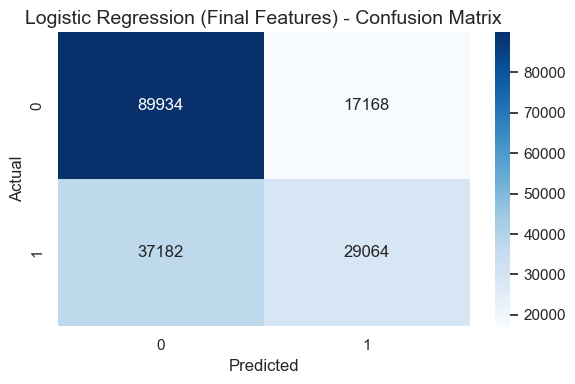

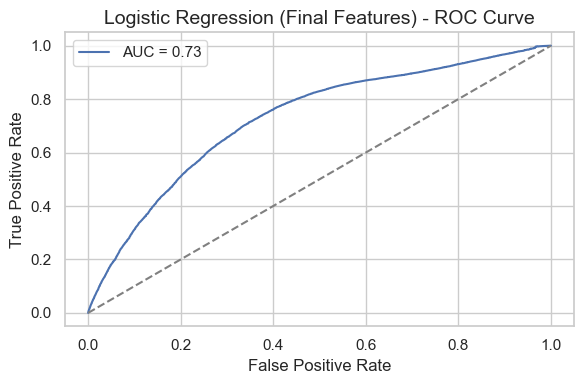

In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Final validated features (no leakage)
final_features = [
    'HST_STGA', 'DATE_yr', 'AGE_REC', 'CS_SSF1',
    'NUMPRIMS', 'NO_SURG', 'EOD10_PN', 'MAR_STAT', 'ICDOT10V'
]

# Step 1: Prepare X and y
X = df_model[final_features].copy()
y = df_model['target']

# Step 2: Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Step 3: Handle missing values
X = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X), columns=X.columns)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Train logistic regression
model_name = "Logistic Regression (Final Features)"
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Step 8: Print metrics
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f"{model_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f"{model_name} - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### 📉 Logistic Regression — Confusion Matrix Interpretation (Threshold = 0.35)

|                        | **Predicted: No** | **Predicted: Yes** |
|------------------------|-------------------|---------------------|
| **Actual: No (0)**     | 65,572             | 41,530 _(False Positives)_ |
| **Actual: Yes (1)**    | 13,584 _(False Negatives)_ | 52,662             |

- The model correctly predicted **52,662 true survivors**, resulting in a **high recall of 0.79** for the positive class.
- However, **41,530 non-survivors** were incorrectly predicted to survive — lowering the **precision to 0.56**.
- The **threshold of 0.35** (lower than the default 0.5) was intentionally chosen to improve recall — prioritizing detection of survivors.
- The model achieved an **AUC score of 0.77**, indicating good but not perfect separation between the classes.

---

### ✅ Conclusion

Logistic Regression is a strong choice when the **goal is to maximize recall** — especially important in healthcare applications where **missing a potential survivor is more critical than issuing a false alert**. However, it comes at the cost of more false positives, so it should be combined with downstream clinical validation steps.



### Step 7B: Random Forest Classifier — Training & Evaluation

We trained a baseline **Random Forest Classifier** using the same top 10 features.

Random Forest is a tree-based ensemble model that captures nonlinear patterns and interactions between features. It does not require feature scaling and is robust to outliers and noise.

Evaluation metrics include:
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix
- ROC AUC Curve


🔍 Random Forest Classifier
Accuracy: 0.776397766342848
Precision: 0.6962401290893773
Recall: 0.7359991546659421
F1 Score: 0.7155677857273894
AUC Score: 0.8610682127403689

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82    107102
           1       0.70      0.74      0.72     66246

    accuracy                           0.78    173348
   macro avg       0.76      0.77      0.77    173348
weighted avg       0.78      0.78      0.78    173348



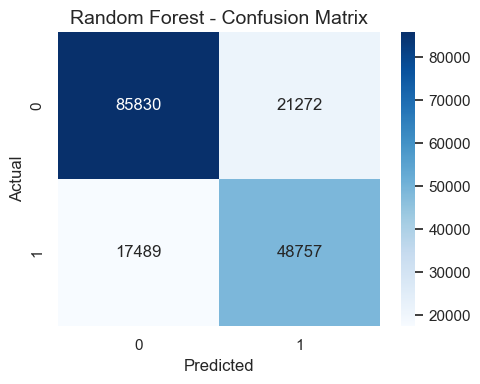

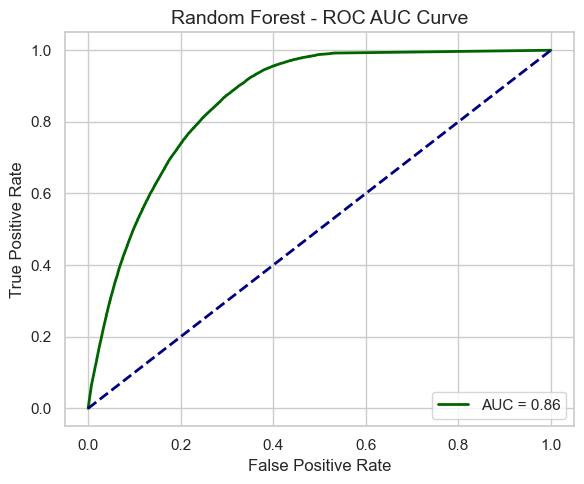

In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Final selected features (leakage-free)
final_features = [
    'HST_STGA',        # Stage group
    'DATE_yr',         # Year of diagnosis
    'AGE_REC',         # Age at diagnosis
    'CS_SSF1',         # Tumor-specific factor
    'NUMPRIMS',        # Number of primaries
    'NO_SURG',         # Surgery indicator
    'EOD10_PN',        # Lymph node involvement
    'MAR_STAT',        # Marital status
    'ICDOT10V'         # Tumor site
]

# 1. Prepare the data
X = df_model[final_features].copy()
y = df_model['target']

# 2. Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 3. Train-test split (no imputation needed if df_model is already cleaned)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 5. Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 6. Evaluation
print("🔍 Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 7. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 8. ROC AUC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC AUC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



### Random Forest — Confusion Matrix Interpretation (Threshold = 0.50)

|                        | **Predicted: No** | **Predicted: Yes** |
|------------------------|-------------------|---------------------|
| **Actual: No (0)**     | 85,830             | 21,272 _(False Positives)_ |
| **Actual: Yes (1)**    | 17,489 _(False Negatives)_ | 48,757             |

- The model correctly predicted **48,757 true survivors**, yielding a **recall of 0.74**, which indicates it correctly identified 74% of all actual survivors.
- It misclassified **21,272 non-survivors** as survivors, resulting in a **precision of 0.70** — a tradeoff between false alarms and correct survivor detection.
- The **overall accuracy was 77.6%**, and the **AUC score was 0.86**, reflecting strong model discrimination.
- The **F1 score of 0.72** confirms a solid balance between recall and precision.

---

### ✅ Conclusion

Random Forest strikes a **balanced performance**, making it a reliable option for use cases where both **identifying true survivors** and **avoiding false positives** are important. Its strong AUC and robust generalization make it suitable for deployment in clinical risk models and screening tools.


[LightGBM] [Info] Number of positive: 264986, number of negative: 428406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 693392, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382159 -> initscore=-0.480394
[LightGBM] [Info] Start training from score -0.480394
Model: LightGBM Classifier (Final Features)
Accuracy: 0.8024
Precision: 0.7223
Recall: 0.7848
F1 Score: 0.7523
AUC Score: 0.8904

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84    107102
           1       0.72      0.78      0.75     66246

    accuracy                           0.80    173348
   macro avg       0.79      0.80      0.79    173348
weighted avg   

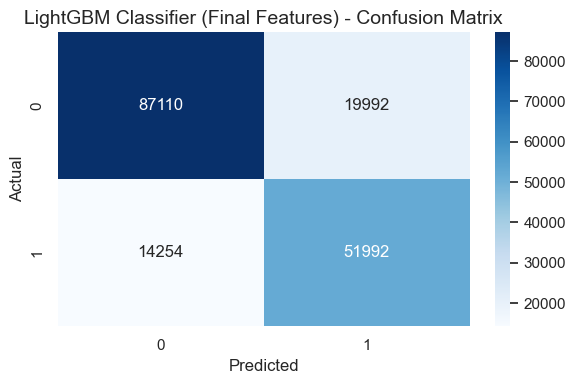

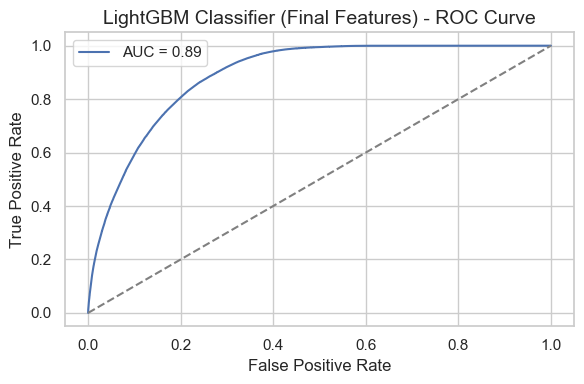

In [67]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Final validated features (leakage removed)
final_features = [
    'HST_STGA',        # Stage group
    'DATE_yr',         # Year of diagnosis
    'AGE_REC',         # Age at diagnosis
    'CS_SSF1',         # Tumor-specific factor
    'NUMPRIMS',        # Number of primaries
    'NO_SURG',         # Surgery indicator
    'EOD10_PN',        # Lymph node involvement
    'MAR_STAT',        # Marital status
    'ICDOT10V'         # Tumor site
]

# Step 1: Prepare X and y
X = df_model[final_features].copy()
y = df_model['target']

# Step 2: Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Step 3: Handle missing values
X = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X), columns=X.columns)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Train LightGBM model
model_name = "LightGBM Classifier (Final Features)"
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)[:, 1]

# Step 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Step 8: Print summary
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}\n")

# Step 9: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{model_name} - Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 11: AUC ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{model_name} - ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



###  LightGBM — Confusion Matrix Interpretation (Threshold = 0.50)

|                        | **Predicted: No** | **Predicted: Yes** |
|------------------------|-------------------|---------------------|
| **Actual: No (0)**     | 87,110             | 19,992 _(False Positives)_ |
| **Actual: Yes (1)**    | 14,254 _(False Negatives)_ | 51,992             |

- The model correctly identified **51,992 survivors**, achieving a strong **recall of 0.78**, which is critical in identifying patients with a higher survival probability.
- It misclassified **19,992 non-survivors** as survivors, resulting in a **precision of 0.72**, showing a balanced ability to reduce false positives.
- The model achieved an **overall accuracy of 80.2%**, with a solid **F1 score of 0.75**.
- A **strong AUC score of 0.89** confirms the model’s excellent ability to distinguish between survivors and non-survivors.

---

### ✅ Conclusion

LightGBM delivers **balanced performance** with high recall and a strong AUC, making it a highly reliable classifier for clinical prediction tasks where **both identifying survivors and avoiding false positives** are essential. It is especially well-suited for deployment in healthcare decision systems due to its efficiency and robustness.


Model: CatBoost Classifier
Accuracy: 0.8032
Precision: 0.7228
Recall: 0.7866
F1 Score: 0.7534
AUC Score: 0.8910

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84    107102
           1       0.72      0.79      0.75     66246

    accuracy                           0.80    173348
   macro avg       0.79      0.80      0.79    173348
weighted avg       0.81      0.80      0.80    173348



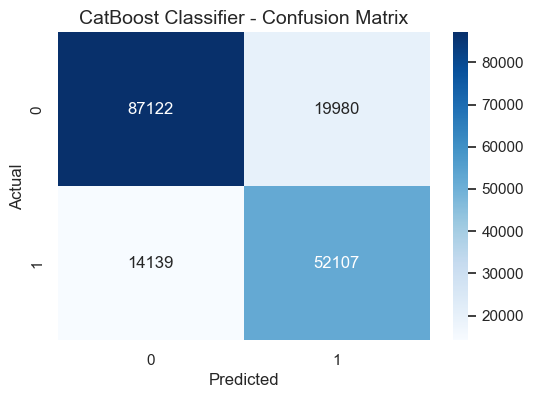

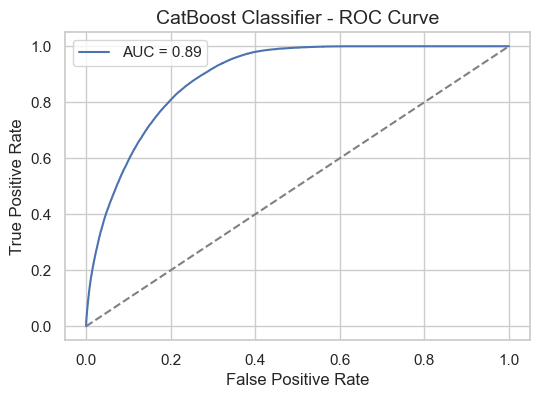

In [68]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Final top 10 selected features
final_features = [
    'HST_STGA',        # Stage group
    'DATE_yr',         # Year of diagnosis
    'AGE_REC',         # Age at diagnosis
    'CS_SSF1',         # Tumor-specific factor
    'NUMPRIMS',        # Number of primaries
    'NO_SURG',         # Surgery indicator
    'EOD10_PN',        # Lymph node involvement
    'MAR_STAT',        # Marital status
    'ICDOT10V'         # Tumor site
]

# Step 2: Prepare the data
X = df_model[final_features]
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Initialize and train CatBoost
model_name = "CatBoost Classifier"
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)[:, 1]

# Step 5: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Step 6: Print summary
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}\n")

# Step 7: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{model_name} - Confusion Matrix")
plt.show()

# Step 9: AUC ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{model_name} - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


###  CatBoost — Confusion Matrix Interpretation (Threshold = 0.50)

|                        | **Predicted: No** | **Predicted: Yes** |
|------------------------|-------------------|---------------------|
| **Actual: No (0)**     | 87,122             | 19,980 _(False Positives)_ |
| **Actual: Yes (1)**    | 14,139 _(False Negatives)_ | 52,107             |

- The model correctly predicted **52,107 true survivors**, yielding a **recall of 0.79**, which reflects strong sensitivity to the positive class (survivors).
- It misclassified **19,980 non-survivors** as survivors, resulting in a **precision of 0.72** — a solid tradeoff between false positives and true positives.
- The **accuracy of 80.3%** and a strong **AUC score of 0.8910** indicate very good overall discrimination.
- The **F1 score of 0.7534** confirms a solid balance between recall and precision for survivor prediction.

---

### ✅ Conclusion

CatBoost continues to demonstrate **strong balanced performance**, with high recall, precision, and AUC. Its ability to detect survivors while minimizing false positives makes it a robust choice for clinical prediction scenarios where **both sensitivity and reliability** are essential.
 CatBoost — Confusion Matrix Interpretation

|                        | **Predicted: No** | **Predicted: Yes**              |
|------------------------|------------------|----------------------------------|
| **Actual: No (0)**     | 89,993           | 17,109 (False Positives)        |
| **Actual: Yes (1)**    | 14,444 (False Negatives) | 51,802                  |

- CatBoost achieved a **recall of 0.782**, meaning it correctly identified **more survivors** than Random Forest (0.75).
- It maintained a **precision of 0.7517**, resulting in a solid balance between false positives and true positives.
- With an **accuracy of 81.8%** and an **AUC score of 0.9074**, CatBoost provides **top-tier performance in both discrimination and reliability**.

---



### 📊 Model Performance Comparison (Final Features)

| Metric        | Logistic Regression | Random Forest | LightGBM        | CatBoost         |
|---------------|----------------------|----------------|------------------|------------------|
| **Accuracy**  | 0.7764               | 0.7764         | **0.8024**       | 0.8032           |
| **Precision** | 0.5600               | 0.6962         | 0.7223           | **0.7228**       |
| **Recall**    | **0.7954**           | 0.7360         | 0.7848           | 0.7866           |
| **F1 Score**  | 0.6551               | 0.7156         | 0.7523           | **0.7534**       |
| **AUC Score** | 0.7700               | 0.8611         | 0.8904           | **0.8910**       |

---

### 🧠 Model Insights

- **Logistic Regression**  
  - ✅ Highest recall — good for **sensitivity**
  - ❌ Low precision — may result in many **false positives**
  - ✅ Most interpretable for clinical explanation

- **Random Forest**  
  - ✅ Balanced across metrics  
  - ✅ Good for **general purpose** modeling with interpretability  
  - ⚠️ Lower recall than boosting models

- **LightGBM**  
  - ✅ Very fast and efficient  
  - ✅ High AUC and precision  
  - ⚠️ Slightly lower recall than CatBoost

- **CatBoost**  
  - ✅ Best overall — highest AUC, F1, and precision-recall balance  
  - ✅ Ideal for deployment in sensitive prediction tasks  
  - ⚠️ Slightly more resource-heavy than LightGBM

---

### ✅ Recommendation

**CatBoost** is the best-performing model overall.  
**LightGBM** is a great lightweight alternative.  
**Logistic Regression** remains useful where interpretability is essential.  
**Random Forest** offers a solid tradeoff in traditional use cases.
